Title: Bar Plot using Pandas
Slug: bar-plot-python-pandas
Summary: Create simple bar plots in Python using the Pandas library based on the Seaborn tips dataset
Date: 2018-09-13 15:30  
Category: Data Visualizations
Subcategory: Pandas Plot
PostType: Tutorial
Tags: bar plot
Keywords: bar plot python pandas
Authors: Dan Friedman

### Import Modules

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

Bar charts are great at visualizing counts of categorical data. Let's try them out in Pandas Plot.

### Read in Tips Dataset from Seaborn Library

This data contains logs of tips received by waiters and waittresses at a restaurant.

In [11]:
df_tips = sns.load_dataset('tips')

### Preview the Data

Preview the top 5 rows.

In [12]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


With this tips dataset, we have several categorical fields including sex, day, time and size (# of people seated at a table).

### Examine Count of Tips Recorded by Gender

First, we can call the `value_counts` method on the `sex` (aka gender) field to see the count of unique values for each gender type.

In [13]:
df_tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

The output above is a Pandas Series in which the index items are Male and Female and the values are the count of each index item in our original tips sex field.

### Visualize Count of Tips Recorded by Gender

We access the *sex* field, call the `value_counts` method to get a count of unique values, then call the `plot` method and pass in `bar` (for bar chart) to the `kind` argument.

Please see the <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html' rel='nofollow'>Pandas Series official documentation page</a> for more information.

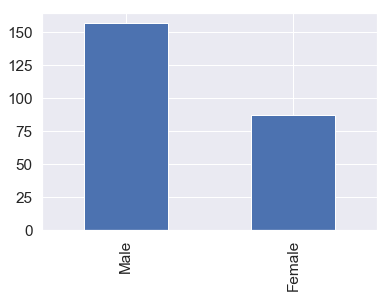

In [14]:
df_tips['sex'].value_counts().plot(kind='bar');

In our tips dataset, we have more records of tips for male waiters than female waitresses.

#### Style Plot 

Below, I apply several styles to our plot from above so it's easier to interpret.

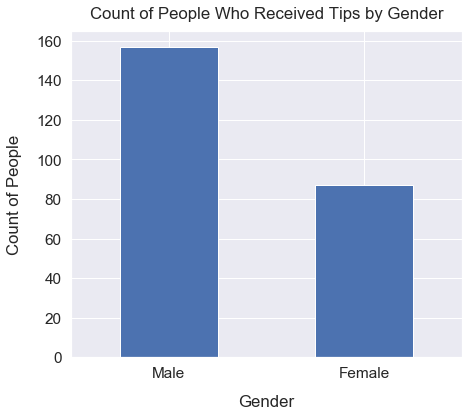

In [15]:
sns.set(font_scale=1.4)
df_tips['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Received Tips by Gender", y=1.02);

### Visualize Count of Days for Recorded Tips

We access the day field, call the value_counts method to get a count of unique values, then call the `plot` method and pass in `bar` (for bar chart) to the `kind` argument.

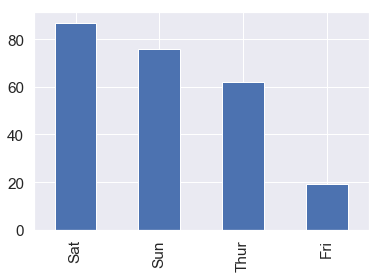

In [16]:
df_tips['day'].value_counts().plot(kind='bar');

Most of our tip records were on Saturday followed by Sunday. Only 4 days have recorded tips.

#### Style Plot 

Below, I apply several styles to our plot from above so it's easier to interpret. I turn our vertical bar plot into a horizontal bar plot.

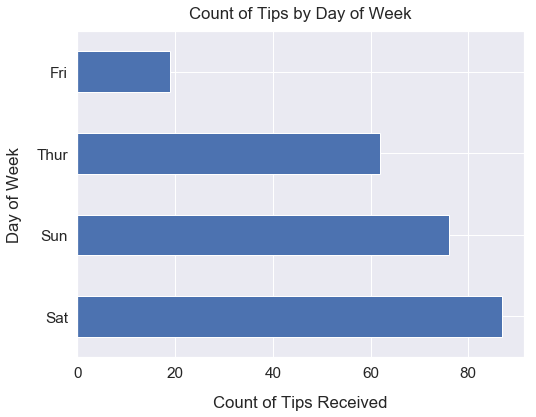

In [17]:
df_tips['day'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of Tips Received", labelpad=14)
plt.ylabel("Day of Week", labelpad=14)
plt.title("Count of Tips by Day of Week", y=1.02);